In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import seaborn as sns

In [2]:
data_frame = pd.read_csv('Crime_Data_2010_2017.csv')
df = data_frame.copy()

In [3]:
data_frame.shape

(1584316, 26)

In [4]:
data_frame.isna().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

## Drop Useless Columns

In [5]:
df = df.drop(["Crime Code 1", "Crime Code 2", "Crime Code 3", "Crime Code 4", "MO Codes", "Date Reported",
              "Premise Code", "Premise Description", "Weapon Used Code","Cross Street", "Status Code",
              "Status Description"], axis = 1)

## Crime Code Description

In [6]:
crime_code_des = df[df['Crime Code Description'].isna() == True]
crime_code_des.groupby('Crime Code').count()['DR Number'].to_frame().rename(columns={'DR Number': "Count Null Described Crime Code"})

,Count Null Described Crime Code
Crime Code,
760,90
814,86
822,186
921,50


In [7]:
Null_Described_Crime_Code = df[df['Crime Code'].isin([760, 814, 822, 921])]
Null_Described_Crime_Code.groupby('Crime Code').count()[['DR Number',
                                                         'Crime Code Description']].rename(columns={'DR Number': "Count Crime Code Description",
                                                                                                              'Crime Code Description': 'Count Null Descriptions'})

,Count Crime Code Description,Count Null Descriptions
Crime Code,,
760,90,0
814,86,0
822,186,0
921,50,0


In [8]:
#drop columns with null crime code description
df = df[df["Crime Code Description"].notnull()]
df = df.drop('Crime Code', axis = 1)

## Victim Sex

In [9]:
data_frame.groupby('Victim Sex').count()['DR Number']

Victim Sex
-         1
F    675402
H        53
M    739581
X     24080
Name: DR Number, dtype: int64

In [10]:
#calculate F:M:H gender ratio
gender_count = df['Victim Sex'].value_counts()
    
M_ratio = gender_count['M'] / (gender_count['M'] + gender_count['F'] + gender_count['X'])
F_ratio = gender_count['F'] / (gender_count['M'] + gender_count['F'] + gender_count['X'])
X_ratio = gender_count['X'] / (gender_count['M'] + gender_count['F'] + gender_count['X'])

#clean victim_sex column based on ratio    
def impute(x): 
    if pd.isna(x):
        return np.random.choice(['M', 'F', 'X'], p=[M_ratio, F_ratio, X_ratio])
    elif x == 'H':
        return np.random.choice(['M', 'F', 'X'], p=[M_ratio, F_ratio, X_ratio])
    elif x == '-':
        return np.random.choice(['M', 'F', 'X'], p=[M_ratio, F_ratio, X_ratio])
    else:
        return x

In [11]:
#clean victim sex column
df['Victim Sex'] = df['Victim Sex'].apply(impute)
df.groupby('Victim Sex').count()['DR Number']

Victim Sex
F    743361
M    814041
X     26502
Name: DR Number, dtype: int64

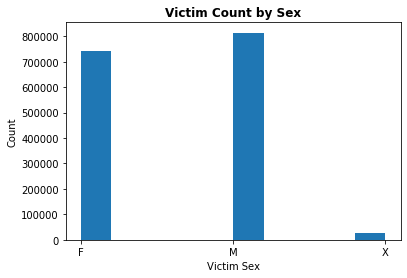

In [12]:
plt.hist(df['Victim Sex'])
plt.title('Victim Count by Sex', fontweight='bold')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

## Victim Age

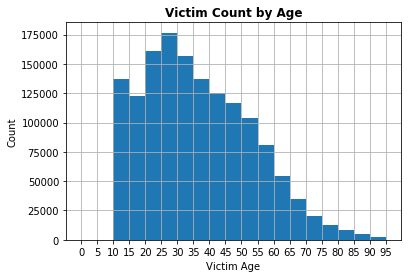

In [13]:
plt.hist(df['Victim Age'], bins = range(0, 100, 5))
plt.title('Victim Count by Age', fontweight='bold')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(range(0, 100, 5))
plt.grid()
plt.show()

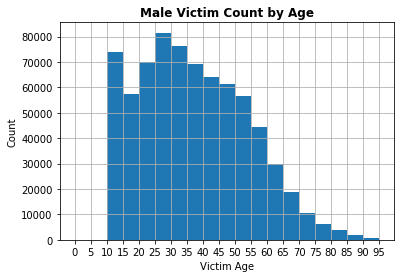

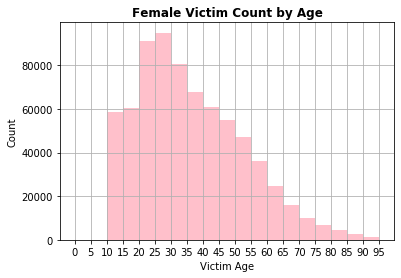

In [14]:
df_M = df[df['Victim Sex'] == 'M']
df_F = df[df['Victim Sex'] == 'F']

plt.hist(df_M['Victim Age'], bins = range(0, 100, 5))
plt.title('Male Victim Count by Age', fontweight='bold')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(range(0, 100, 5))
plt.grid()
plt.show()

plt.hist(df_F['Victim Age'], bins = range(0, 100, 5), color='pink')
plt.title('Female Victim Count by Age', fontweight='bold')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(range(0, 100, 5))
plt.grid()
plt.show()

In [15]:
bins = pd.cut(df_M['Victim Age'], range(0,101,5))
df1 = df_M.groupby(bins)['Victim Age'].agg(['count'])
df1.rename(columns = {'count':'Male Counts'})
df1.shape

(20, 1)

In [16]:
bins = pd.cut(df_F['Victim Age'], range(0,101,5))
df2 = df_F.groupby(bins)['Victim Age'].agg(['count'])
df2.rename(columns = {'count':'Female Counts'})
df2.shape

(20, 1)

In [17]:
df1.to_csv(r'MaleVictimAge.csv')
df2.to_csv(r'FemaleVictimAge.csv')

## Date Occured

In [18]:
#Date time to datetime, add year, month, day columns
df['Date Occurred']= pd.to_datetime(df['Date Occurred'])

df['Year Occurred'] = df['Date Occurred'].dt.year
df['Month Occurred'] = df['Date Occurred'].dt.month
#df['Day Occurred'] = df['Date Occurred'].dt.day

df['Month_year Occurred'] = pd.to_datetime(df['Date Occurred']).dt.to_period('M')

In [19]:
df.groupby('Month_year Occurred').count()['DR Number'].to_csv(r'MonthYearOccurred.csv')

/Users/jiemintang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Year Occurred
2010    208569
2011    200176
2012    200792
2013    191757
2014    194459
2015    213863
2016    222846
2017    151442
dtype: int64


Text(0, 0.5, 'Count')

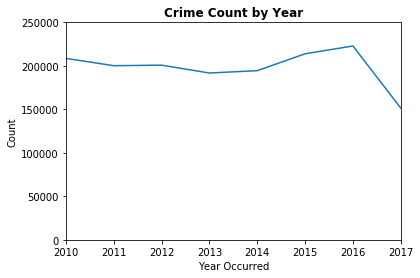

In [20]:
# Plot count by year
print(df.groupby('Year Occurred').size())
df.groupby('Year Occurred').size().plot(ylim=(0, 250000))
plt.title('Crime Count by Year',fontweight='bold')
plt.xlabel('Year Occurred')
plt.ylabel('Count')

Month_year Occurred
2010-01    19280
2010-02    15985
2010-03    18097
2010-04    17733
2010-05    17692
           ...  
2017-05    19007
2017-06    18469
2017-07    19541
2017-08    18329
2017-09     3311
Freq: M, Length: 93, dtype: int64


Text(0, 0.5, 'Count')

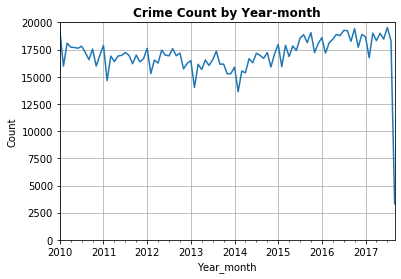

In [21]:
#Plot coybt by month
print(df.groupby('Month_year Occurred').size())
df.groupby('Month_year Occurred').size().plot(ylim=(0, 20000))
plt.title('Crime Count by Year-month',fontweight='bold')
plt.grid()
plt.xlabel('Year_month')
plt.ylabel('Count')

In [22]:
df_month = df[df['Year Occurred'] != 2017]
df_month.groupby('Month Occurred').size() / df_month.shape[0]

Month Occurred
1     0.086385
2     0.074477
3     0.083245
4     0.081519
5     0.085177
6     0.083867
7     0.086231
8     0.086759
9     0.083061
10    0.086307
11    0.079745
12    0.083227
dtype: float64

Month Occurred
1     0.086385
2     0.074477
3     0.083245
4     0.081519
5     0.085177
6     0.083867
7     0.086231
8     0.086759
9     0.083061
10    0.086307
11    0.079745
12    0.083227
dtype: float64


Text(0, 0.5, 'Percentage')

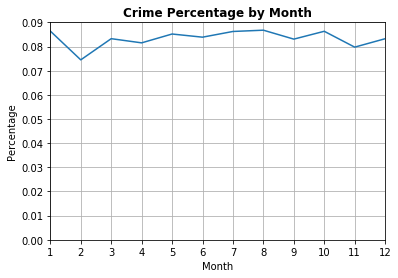

In [23]:
#Plot rate of crimes
print(df_month.groupby('Month Occurred').size() / df_month.shape[0])
(df_month.groupby('Month Occurred').size() / df_month.shape[0]).plot(ylim=(0, 0.09))
plt.title('Crime Percentage by Month',fontweight='bold')
plt.xticks(range(1, 13, 1))
plt.grid()
plt.xlabel('Month')
plt.ylabel('Percentage')

## Vistim Descent

In [24]:
#Map victim descent
descentDict = {"A":"Other Asian", "H":"Hispanic/Latin/Mexican", "B":"Black", "C":"Chinese", 
               "D":"Cambodian", "F":"Filipino", "G":"Guamanian", "I":"American Indian/Alaskan Native", 
               "J":"Japanese", "K":"Korean", "L":"Laotian", "O":"Other", "P":"Pacific Islander",
               "S":"Samoan", "U":"Hawaiian", "V":"Vietamese", "W":"White", "X":"Unknown", 
               "Z":"Asian Indian", "-":"None"}

df = df.replace({"Victim Descent": descentDict})
df["Victim Descent"].fillna("None", inplace = True)

In [25]:
df.groupby('Victim Descent').count()['DR Number'].to_csv(r'VictimDescent.csv')

/Users/jiemintang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Victim Descent
American Indian/Alaskan Native       663
Asian Indian                          55
Black                             254895
Cambodian                             15
Chinese                              618
Filipino                            1885
Guamanian                             60
Hawaiian                             137
Hispanic/Latin/Mexican            549363
Japanese                             237
Korean                              7136
Laotian                               10
None                              145232
Other                             152758
Other Asian                        37136
Pacific Islander                     276
Samoan                                24
Unknown                            41531
Vietamese                             86
White                             391787
Name: DR Number, dtype: int64


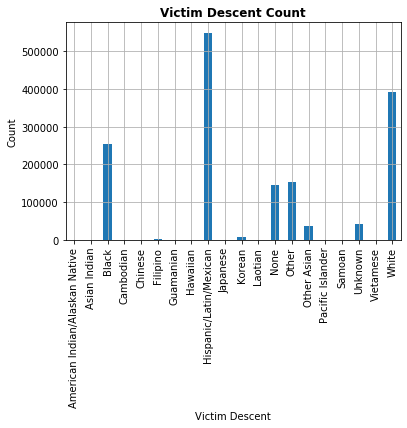

In [26]:
#Plot count of eace
print(df.groupby('Victim Descent').count()['DR Number'])

df.groupby('Victim Descent').count()['DR Number'].plot(kind='bar')
plt.title('Victim Descent Count', fontweight='bold')
plt.xlabel('Victim Descent')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.grid()
plt.show()

## Time Occurred

In [27]:
#Extract hour and minute of the crime occurred
df['Time Occurred'] = df['Time Occurred'].apply(lambda x:str(int(x)).zfill(4))
df['Time Occurred'] = pd.to_datetime(df['Time Occurred'], format='%H%M')

df['Hour Occurred'] = df['Time Occurred'].dt.hour
#df['Minute Occurred'] = df['Date Occurred'].dt.minute

In [28]:
df.groupby('Hour Occurred').count()['DR Number'].to_csv(r'HourOccurred.csv')

/Users/jiemintang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Hour Occurred
0      65377
1      45425
2      38185
3      28008
4      20988
5      19058
6      26847
7      40055
8      67521
9      59646
10     67093
11     63217
12    127415
13     68490
14     75978
15     82720
16     81375
17     87771
18     94633
19     89778
20     91603
21     86063
22     83256
23     73402
dtype: int64


Text(0, 0.5, 'Count')

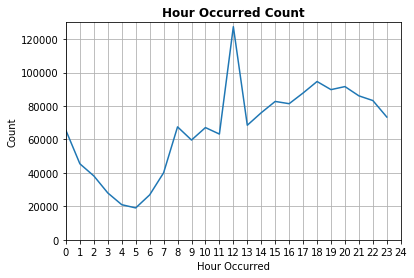

In [29]:
print(df.groupby('Hour Occurred').size())
df.groupby('Hour Occurred').size().plot(ylim=(0, 130000))
plt.xticks(range(0, 25, 1))
plt.title('Hour Occurred Count',fontweight='bold')
plt.grid()
plt.xlabel('Hour Occurred')
plt.ylabel('Count')

## Crime Code Description

In [30]:
df_num_crime = df.groupby('Crime Code Description').count()['DR Number'].to_frame()
df_num_crime.reset_index(inplace=True)

df_crime_sorted = df_num_crime.sort_values('DR Number',ascending = False)[:20]

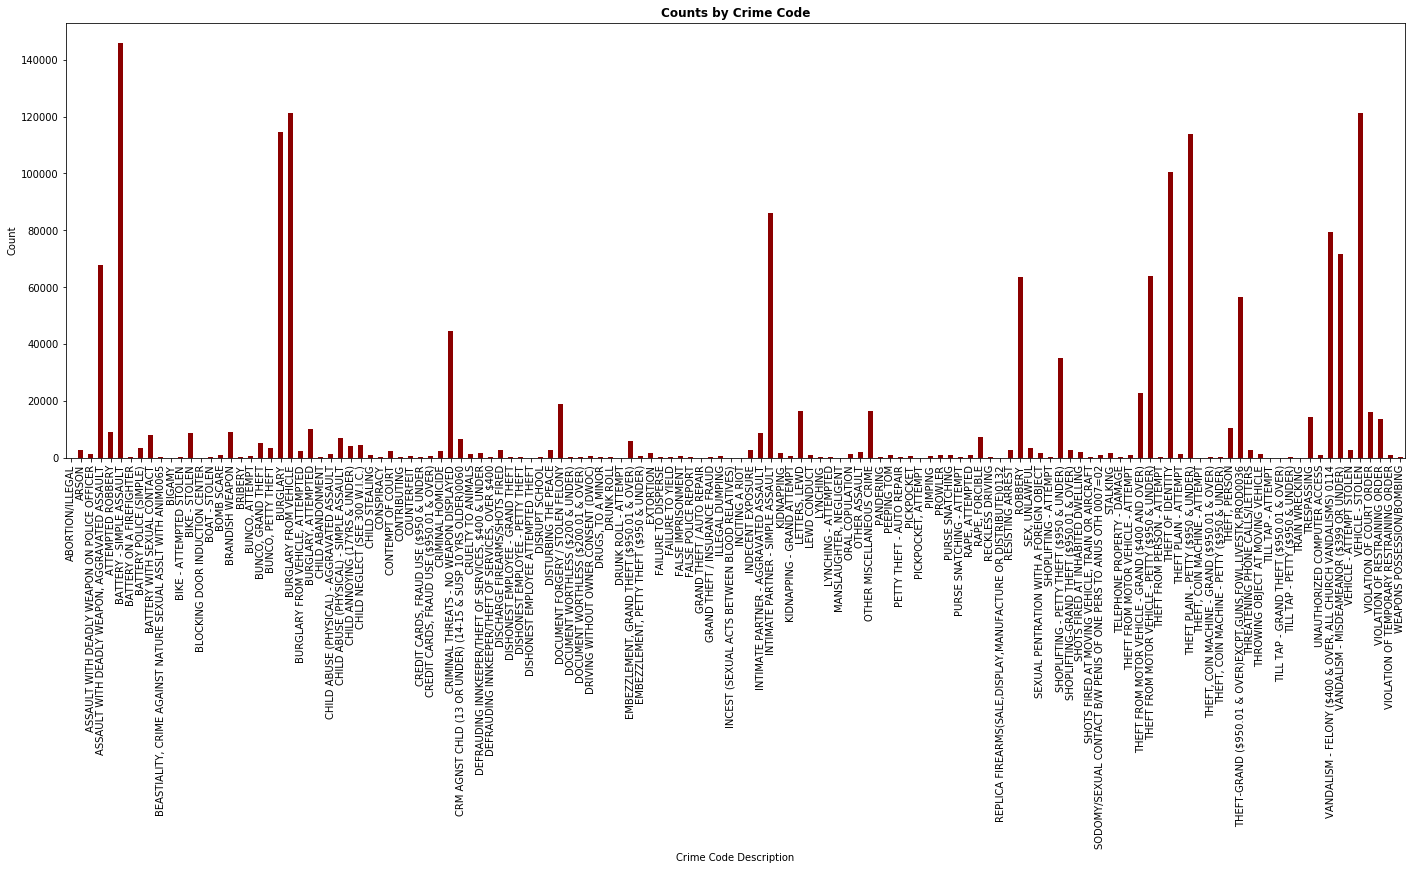

In [32]:
#df_num_crime.plot.bar(figsize=(30,8))
df_num_crime.plot.bar(x='Crime Code Description', y='DR Number', figsize=(24,8), color='darkred', legend=None)
#plt.bar(df['Crime Code Description'], bins = 140)
plt.title('Counts by Crime Code', fontweight='bold')
plt.xlabel('Crime Code Description')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

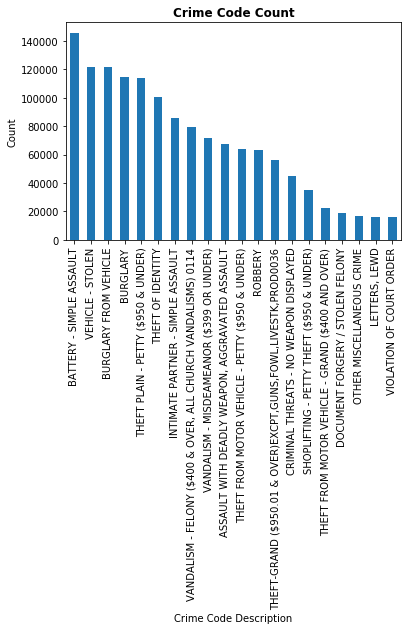

In [32]:
df_crime_sorted.plot.bar(x='Crime Code Description', y='DR Number', legend=None)
plt.title('Crime Code Count', fontweight='bold')
plt.xlabel('Crime Code Description')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

## Weapon Description

In [33]:
#Top 20 types of weapon used
df_weapon = df.groupby('Weapon Description').count()['DR Number'].to_frame()
df_weapon.reset_index(inplace=True)

df_weapon_sorted = df_weapon.sort_values('DR Number',ascending = False)[:20]

df_weapon_sorted

,Weapon Description,DR Number
65,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",319716
78,VERBAL THREAT,43783
75,UNKNOWN WEAPON/OTHER WEAPON,40739
27,HAND GUN,25345
58,SEMI-AUTOMATIC PISTOL,10096
32,KNIFE WITH BLADE 6INCHES OR LESS,9333
44,OTHER KNIFE,6946
73,UNKNOWN FIREARM,6037
77,VEHICLE,5348
50,REVOLVER,4567


In [34]:
df_weapon_sorted.to_csv(r'weapon.csv')

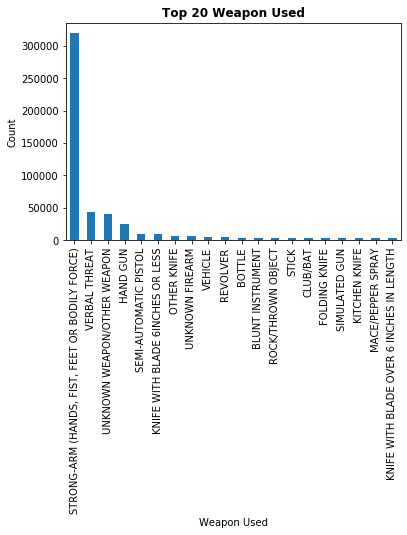

In [35]:
df_weapon_sorted.plot(x='Weapon Description', y='DR Number', kind='bar', legend=None)
plt.title('Top 20 Weapon Used',fontweight='bold')
plt.xticks(rotation=90)
plt.xlabel('Weapon Used')
plt.ylabel('Count')
plt.show()

## Area ID

In [36]:
df.groupby('Area Name').count()['DR Number'].to_csv(r'AreaCounts.csv')

/Users/jiemintang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


Area Name
77th Street    110545
Central         67081
Devonshire      74007
Foothill        60927
Harbor          70942
Hollenbeck      57577
Hollywood       72206
Mission         80230
N Hollywood     86370
Newton          74373
Northeast       76616
Olympic         70108
Pacific         83756
Rampart         66999
Southeast       83475
Southwest      102233
Topanga         73280
Van Nuys        75412
West LA         66380
West Valley     67792
Wilshire        63595
dtype: int64


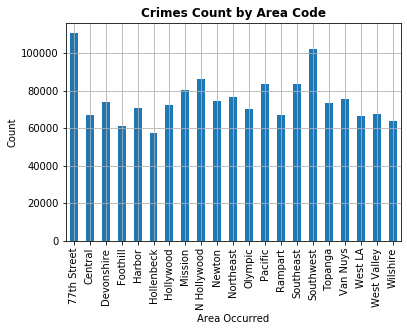

In [37]:
print(df.groupby('Area Name').size())
df.groupby('Area Name').size().plot(kind='bar')
plt.title('Crimes Count by Area Code',fontweight='bold')
plt.grid()
plt.xlabel('Area Occurred')
plt.ylabel('Count')
plt.show()

In [38]:
#Total population by area 
Area_Name = ["77th Street", "Southeast", "Southwest", "Harbor", "Central", "Hollenbeck", "Newton", "Rampart", 
             "Northeast", "Olympic", "Devonshire", "Foothill", "Mission", "N Hollywood", "Van Nuys",
             "West Valley", "Topanga", "Hollywood", "Pacific", "West LA", "Wilshire"]
Area_Population = [175522, 127984, 164552, 171866, 40000, 200000, 150000, 375000, 777000, 200000, 219136, 182214, 
              225849, 220000, 325000, 196840, 8289, 300000, 200000, 228000, 251000]
crime_rate_by_area = pd.DataFrame(list(zip(Area_Name, Area_Population)), columns =['Area Name', 'Area_Population'])
crime_rate_by_area = crime_rate_by_area.sort_values(by ='Area Name' )

In [39]:
crime_count_by_area = df[df['Year Occurred'] == 2010].groupby('Area Name').size().to_list()
crime_rate_by_area['Crime Count'] = crime_count_by_area
crime_rate_by_area['Crime Rate'] = crime_rate_by_area['Crime Count'] / crime_rate_by_area['Area_Population']
crime_rate_by_area

,Area Name,Area_Population,Crime Count,Crime Rate
0,77th Street,175522,14408,0.082087
4,Central,40000,7134,0.178350
10,Devonshire,219136,10600,0.048372
11,Foothill,182214,9303,0.051055
3,Harbor,171866,9560,0.055625
5,Hollenbeck,200000,7374,0.036870
17,Hollywood,300000,9181,0.030603
12,Mission,225849,10520,0.046580
13,N Hollywood,220000,11328,0.051491
6,Newton,150000,9964,0.066427


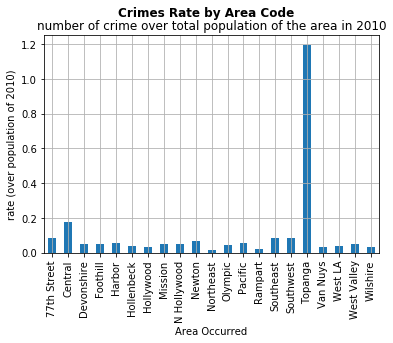

In [40]:
crime_rate_by_area.plot(x='Area Name', y='Crime Rate', kind="bar", legend=None)
plt.title('number of crime over total population of the area in 2010')
plt.suptitle('Crimes Rate by Area Code', fontweight='bold')
plt.grid()
plt.xlabel('Area Occurred')
plt.ylabel('rate (over population of 2010)')
plt.show()

## Month vs. Hour Occurred

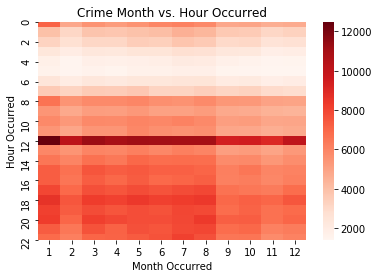

<Figure size 432x288 with 0 Axes>

In [65]:
month_hour = df[['Month Occurred', 'Hour Occurred', 'DR Number']]
heatmap1_data = pd.pivot_table(month_hour, values='DR Number', index=['Hour Occurred'], columns='Month Occurred', aggfunc='count')
sns.heatmap(heatmap1_data, cmap="Reds")
plt.title('Crime Month vs. Hour Occurred')
plt.show()
plt.savefig("month_hr_heatmap.jpg")

## Crime Code Description vs. Hour Occurred

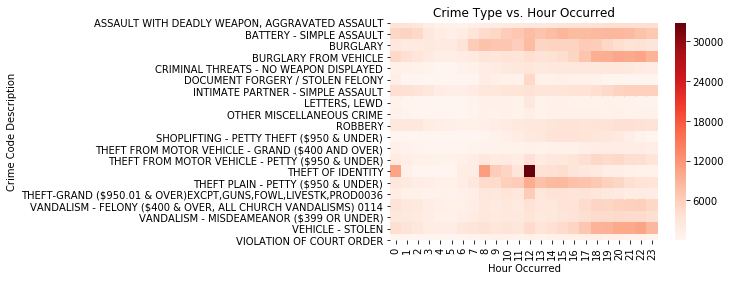

<Figure size 432x288 with 0 Axes>

In [64]:
#Find top 20 crime types
top_crime_lst = df_crime_sorted['Crime Code Description'].to_list()

crime_hour = df[df['Crime Code Description'].isin(top_crime_lst)]
crime_hour = crime_hour[['Crime Code Description', 'Hour Occurred', 'DR Number']]
heatmap2_data = pd.pivot_table(crime_hour, values='DR Number', index=['Crime Code Description'], columns='Hour Occurred', aggfunc='count')
sns.heatmap(heatmap2_data, cmap="Reds")
plt.title('Crime Type vs. Hour Occurred')
plt.show()
plt.savefig("crime_hr_heatmap.jpg")

## Area Name vs. Hour Occurred

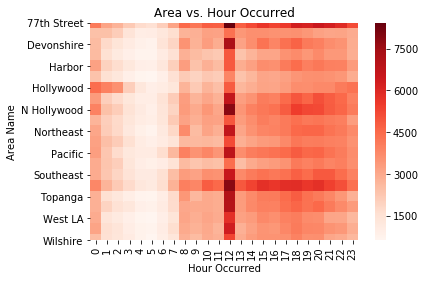

<Figure size 432x288 with 0 Axes>

In [63]:
area_hour = df[['Area Name', 'Hour Occurred', 'DR Number']]
heatmap3_data = pd.pivot_table(area_hour, values='DR Number', index=['Area Name'], columns='Hour Occurred', aggfunc='count')
sns.heatmap(heatmap3_data, cmap="Reds")
plt.title('Area vs. Hour Occurred')
plt.show()
plt.savefig("area_hr_heatmap.jpg")